In [32]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [5]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/mtcars.csv', index_col=0) 

dataset.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
# Extract X and Y from the dataset
X = dataset.drop(["mpg"], axis=1) 
y = dataset["mpg"] 

In [ ]:
# Split training and testing tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
# Fit the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Extract coeficients and y_intercept
y_intercept = model.intercept_ 
coeficients = pd.DataFrame(model.coef_, X.columns, columns=["Coeficient"])
coeficients

,Coeficient
cyl,0.190203
disp,0.008613
hp,-0.022868
drat,1.477014
wt,-3.564785
qsec,0.924358
vs,-1.248904
am,1.340890
gear,0.482458
carb,-0.187354


C:\Users\lenovo\AppData\Local\Temp\ipykernel_3196\2158693827.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sns.lineplot(x=dataset.hp, y=y_intercept + float(coeficients.loc["hp"]) * dataset.hp, color="green", ax=ax[0], label="Reg Line")
C:\Users\lenovo\AppData\Local\Temp\ipykernel_3196\2158693827.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sns.lineplot(x=dataset.disp, y=y_intercept + float(coeficients.loc["disp"]) * dataset.disp, color="red", ax=ax[1], label="Reg. Line")


<Axes: xlabel='disp', ylabel='mpg'>

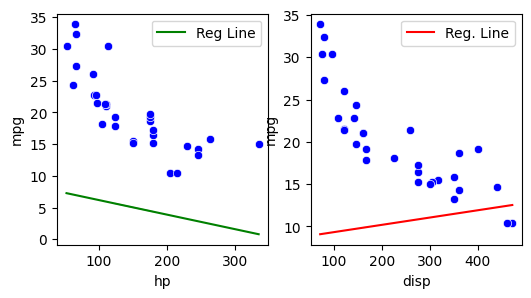

In [31]:
# Drawing the Regression Lines for different X variables 
fig, ax = plt.subplots(1, 2, figsize=(6, 3)) 
ax.flatten() 

sns.scatterplot(x=dataset.hp, y=dataset.mpg, color="blue", ax=ax[0])
sns.lineplot(x=dataset.hp, y=y_intercept + float(coeficients.loc["hp"]) * dataset.hp, color="green", ax=ax[0], label="Reg Line")

sns.scatterplot(x=dataset.disp, y=dataset.mpg, color="blue", ax=ax[1])
sns.lineplot(x=dataset.disp, y=y_intercept + float(coeficients.loc["disp"]) * dataset.disp, color="red", ax=ax[1], label="Reg. Line")

In [48]:
# Assessing the model accuracy MLR vs. SLR 

# Let's make a single linear regression for for disp vs. mpg 
slr_model = LinearRegression()
slr_model.fit(X_train[["disp"]], y_train) 

# Make predictions 
slr_y_predictions = slr_model.predict(X_test[["disp"]]) 

# Assess the accuracy SLR model
slr_mae = metrics.mean_absolute_error(y_test, slr_y_predictions)
slr_mse = metrics.mean_squared_error(y_test, slr_y_predictions) 
slr_r2_score = metrics.r2_score(y_test, slr_y_predictions) 

# Assessing the accuracy of MLR model 
mlr_y_predictions = model.predict(X_test) 

mlr_mae = metrics.mean_absolute_error(y_test, mlr_y_predictions)
mlr_mse = metrics.mean_squared_error(y_test, mlr_y_predictions)
mlr_r2_score = metrics.r2_score(y_test, mlr_y_predictions)


print("----------------Simple Linear Regression Metrics-----------------------")
print(f"MAE: {slr_mae}\nMSE: {slr_mse}\nR2 Score: {slr_r2_score}") 

print("\n----------------Multiple Linear Regression Metrics-----------------------")
print(f"MAE: {mlr_mae}\nMSE: {mlr_mse}\nR2 Score: {mlr_r2_score}")

----------------Simple Linear Regression Metrics-----------------------
MAE: 3.8781638866516146
MSE: 20.500165399900308
R2 Score: 0.6506763489121794

----------------Multiple Linear Regression Metrics-----------------------
MAE: 2.819993447675332
MSE: 11.520900928066675
R2 Score: 0.8036833802310257


The performance of the models improves when we use multiple variables to make the predictions. 

This means that the relatinship between dependent variable and the independent variables cannot be modeled by a single predictor. 